# Includes and set-up

In [45]:
## Setup code for the notebook
%matplotlib notebook
# %matplotlib inline

%load_ext autoreload
%autoreload 2

# These are all the includes used through the notebook
import numpy as np

# Tools for image processing
from numpy.fft import fft2, ifft2, fftshift

import matplotlib.pyplot as plt
from ipytools import display_image   # display image in the notebook
from ipytools import display_imshow  # display image(arrays) in notebook
from ipytools import display_table   # display tables in the notebook
from ipytools import display_gallery # display many images
from skimage.io import imread        # load images, even pgm or url
from glob import glob

# Pandas for table manipulation
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GLOBALS

In [28]:
IMAGE_PATH = "../../images/"

In [29]:
im = {}
for path in glob(IMAGE_PATH + "*"):
    im[path.split("/")[-1].split(".")[0]] = imread(path)

<IPython.core.display.Javascript object>


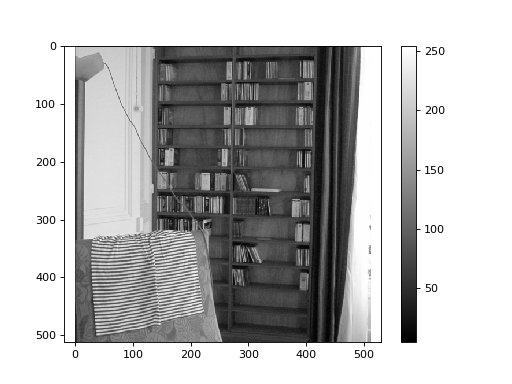

In [46]:
display_imshow(im["room"])

# Fourier pipeline

<IPython.core.display.Javascript object>


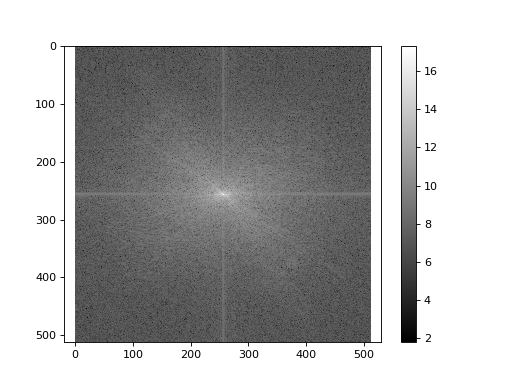

In [48]:
lena_fft = fft2(im["lena"])
display_imshow(np.log(1 + np.abs(fftshift(lena_fft))))

In [53]:
(im["lena"][511] == im["lena"][-1, :]).all()

True

In [55]:
from numpy.matlib import repmat

In [96]:
def per_smooth_decomposition(u):
    """
    Periodic plus Smooth Image Decomposition
    Adapted from matlab implementation of Lionel Moisan
    available here http://www.mi.parisdescartes.fr/~moisan/p+s
    ----------------------------------------------------------
    
    Input:
    ------
    u: 2D array
       original image

    Output:
    -------
    p: 2D array
       periodic component of u
    s: 2D array
       smooth component of u
    """
    # Get the shape of u
    N, M = u.shape
    # Intermediate tool for computation
    v = np.zeros((N, M))
    v[0, :] = u[0, :] - u[-1, :]
    v[-1, :] = -v[0, :]
    v[:, 0] = u[:, 0] - u[:, -1]
    v[:, -1] = u[:, -1] - u[:, 0]
    # Numerator part of smooth FT 
    numerator = 0.5 * fft2(v)
    # Periodic part of smooth FT
    aux = 2 * np.pi * np.indices(u.shape)
    denominator = -2 + np.cos(aux[0] / N) + np.cos(aux[1] / M)
    # To avoid division by 0
    denominator[0, 0] = 1
    s = np.real(ifft2(numerator / denominator))
    p = u - s
    return p, s

In [97]:
p, s = per_smooth_decomposition(im["lena"])

<IPython.core.display.Javascript object>


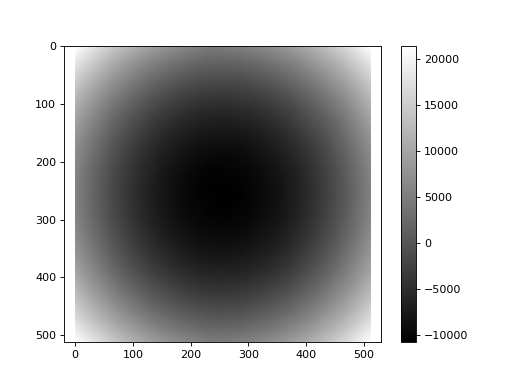

In [98]:
display_imshow(p)

In [86]:
p

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [57]:
v = np.zeros(im["lena"].shape)

In [59]:
v.

ValueError: can only convert an array of size 1 to a Python scalar

In [67]:
aux = np.indices((512, 512))
aux = 2 * np.pi * aux

In [70]:
-4 + 2 * np.cos(aux[0] / 512) + 2 * np.cos(aux[1] / 512)

array([[ 0.        , -0.0001506 , -0.00060236, ..., -0.00135523,
        -0.00060236, -0.0001506 ],
       [-0.0001506 , -0.00030119, -0.00075296, ..., -0.00150583,
        -0.00075296, -0.00030119],
       [-0.00060236, -0.00075296, -0.00120473, ..., -0.00195759,
        -0.00120473, -0.00075296],
       ...,
       [-0.00135523, -0.00150583, -0.00195759, ..., -0.00271046,
        -0.00195759, -0.00150583],
       [-0.00060236, -0.00075296, -0.00120473, ..., -0.00195759,
        -0.00120473, -0.00075296],
       [-0.0001506 , -0.00030119, -0.00075296, ..., -0.00150583,
        -0.00075296, -0.00030119]])

In [72]:
np.indices((5,2 ))

array([[[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4]],

       [[0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]]])